In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/binary/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
df[' Label'] = df[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')

In [5]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [6]:
anova = f_classif(X, y)
anova

(array([1.44773918e+02, 2.94040306e+02, 5.49892459e+01, 1.44067258e+03,
        1.92766118e+02, 3.73066699e+02, 1.05069420e+03, 1.54244411e+03,
        2.04334417e+03, 1.80531627e+01, 7.52953495e+01, 5.02301998e+01,
        9.91324025e+01, 6.59562315e+00, 1.67220936e+02, 1.28525230e+02,
        1.52631064e+02, 2.28496162e+02, 4.06000000e+02, 5.88977655e+01,
        1.91308006e+01, 1.94863903e+03, 7.60286273e+00, 3.16164530e+03,
        2.45283529e+02, 1.84141849e+02, 4.06000000e+02, 1.32601625e+00,
        2.07404496e+03, 5.70638880e+02, 2.35111940e+03, 2.94040306e+02,
        5.49892459e+01, 3.23697790e+02, 2.17119832e+02, 7.42860741e+01,
        5.37823721e+01, 3.54391397e+01, 1.09818198e+00, 1.42495285e+02]),
 array([6.46660682e-033, 3.49244764e-064, 1.40435753e-013, 5.89326456e-279,
        4.49381454e-043, 2.26045960e-080, 2.28539613e-210, 3.37535303e-296,
        0.00000000e+000, 2.18521535e-005, 5.32568527e-018, 1.54692612e-012,
        3.77494155e-023, 1.02502425e-002, 1.112445

Text(0, 0.5, 'F Statistic')

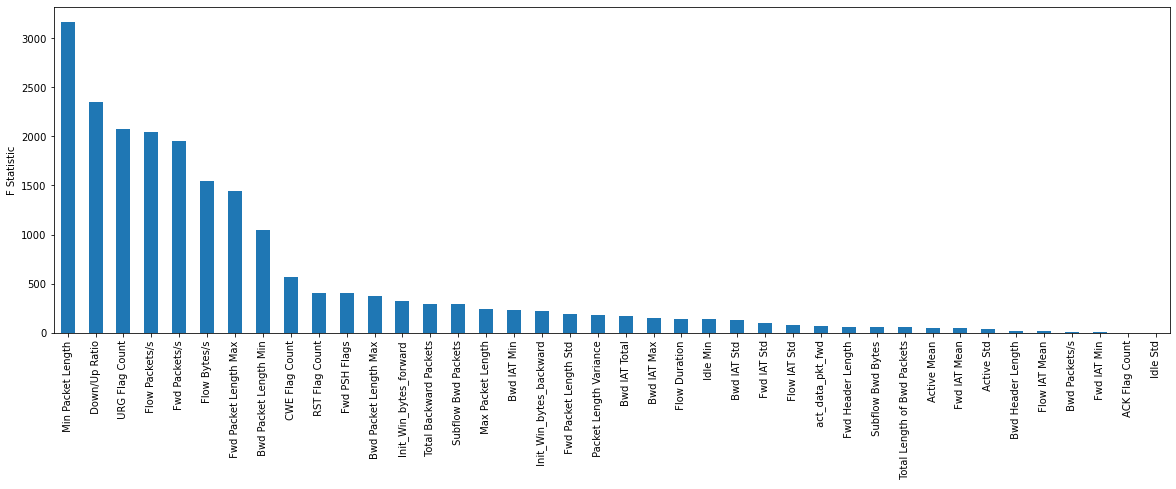

In [7]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

anova_f = pd.Series(anova[0])
anova_f.index = X.columns
anova_f.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('F Statistic')

Text(0, 0.5, 'P values')

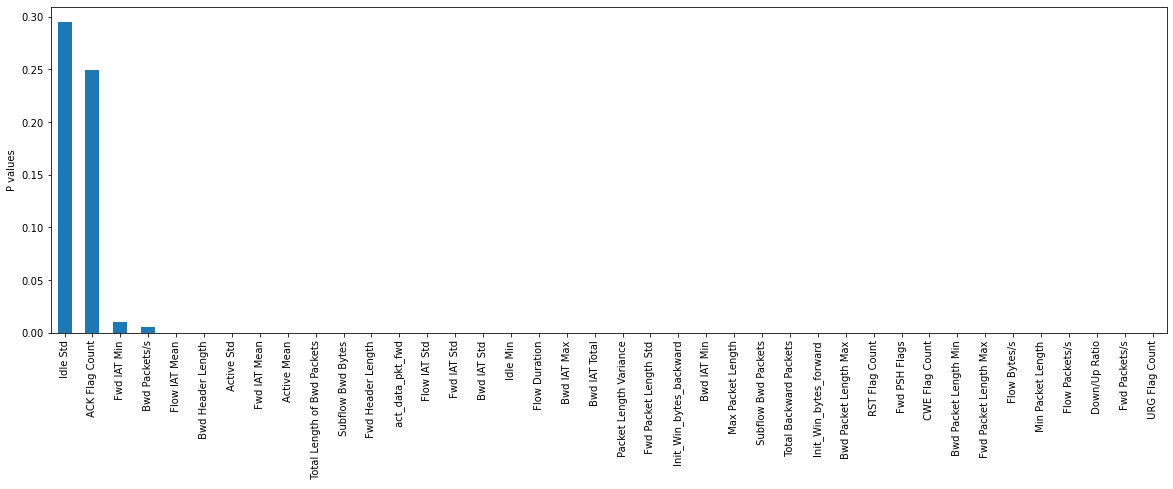

In [8]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

anova_p = pd.Series(anova[1])
anova_p.index = X.columns
anova_p.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('P values')

In [9]:
# here we will select the top 20 features

# select features
selector = SelectKBest(f_classif, k=20).fit(X, y)

# display features
X.columns[selector.get_support()]

Index([' Total Backward Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Variance', ' RST Flag Count',
       ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio',
       ' Subflow Bwd Packets', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward'],
      dtype='object')

In [10]:
# to remove the rest of the features:

X = selector.transform(X)

In [11]:
X.shape

(5280, 20)